# Задание 1-2
Выполнено студенткой группы ИММО-01-25 Чан Минь Ханг

## Задания

1. Применить для тестовых вариантов и вариантов из репозиториев раз
личные алгоритмы поиска ассоциативных правил при одинаковых начальных 
условиях (при одинаковых пороговых значениях для поддержки и достоверности) и сравнить полученные результаты. Для тестовых вариантов выполнить 
ручные расчеты (например, с применением MS Excel) и расчеты с применением 
программных библиотек на языке Python. Для вариантов из репозиториев вы
полнить расчеты с применением программных библиотек на языке Python. 

В качестве алгоритмов поиска ассоциативных правил использовать алгоритмы: 
- Apriori (https://pypi.org/project/apriori-python/); 
- Efficient Apriori (https://pypi.org/project/efficient-apriori/); 
- FPGrowth (https://pypi.org/project/fpgrowth-py/). 

2. Сформировать базы ассоциативных правил с уровнем минимальной до
стоверности 60% и 80%. Вычислить для ассоциативных правил поддержку, до
стоверность, значимость. 

3. Оценить время формирования искомых ассоциативных правил с при
менением различных алгоритмов и построить диаграммы, позволяющие вы
полнить сравнительный анализ. 

4. Выполнить 
визуализацию 
(https://pypi.org/project/pyarmviz/).

In [1]:
import random
import numpy as np
import pandas as pd
import math
import itertools

In [2]:
from apriori_python import apriori
from efficient_apriori import apriori as efficient_apriori
from fpgrowth_py import fpgrowth

import time
import matplotlib.pyplot as plt

## Тестовый вариант

Набор из 20 транзакций на основе чеков покупок в магазине канцтоваров. 


In [3]:
products = ["альбом", "карандаш", "кисть", "краски", "ластик", 
            "линейка", "палитра", "пенал", "ручка", "тетрадь"]

weights = random.sample(range(1, 10001), len(products))
probabilities = [float(i)/sum(weights) for i in weights]

transactions = [np.random.choice(products, size=random.randint(2, 8),
                                 p=probabilities, replace=False).tolist()
                for i in range (20)]

In [4]:
transactions = [['ластик', 'альбом', 'пенал', 'карандаш', 'палитра', 'тетрадь'],
 ['пенал', 'палитра', 'ластик', 'кисть'],
 ['альбом', 'карандаш', 'ручка', 'тетрадь', 'ластик'],
 ['ручка', 'краски', 'палитра', 'пенал', 'ластик'],
 ['пенал', 'кисть', 'ластик', 'альбом', 'тетрадь', 'линейка', 'карандаш', 'палитра'],
 ['пенал', 'ластик', 'кисть', 'линейка'],
 ['пенал', 'палитра'],
 ['карандаш', 'пенал', 'краски'],
 ['карандаш', 'краски', 'палитра', 'тетрадь'],
 ['ластик', 'краски', 'линейка', 'тетрадь', 'пенал', 'альбом'],
 ['кисть', 'альбом', 'пенал', 'ластик', 'карандаш', 'палитра', 'краски', 'ручка'],
 ['линейка', 'альбом', 'тетрадь', 'палитра', 'пенал', 'ручка'],
 ['альбом', 'ластик', 'тетрадь'],
 ['альбом', 'тетрадь'],
 ['ластик', 'карандаш', 'тетрадь', 'пенал', 'альбом'],
 ['карандаш', 'краски', 'ластик', 'кисть', 'тетрадь', 'линейка', 'пенал'],
 ['тетрадь', 'ластик', 'пенал', 'краски'],
 ['ластик', 'карандаш', 'палитра', 'тетрадь'],
 ['ластик', 'пенал', 'линейка', 'палитра'],
 ['пенал', 'ластик', 'тетрадь', 'альбом', 'линейка', 'кисть', 'палитра', 'карандаш']]

In [6]:
transactions_df = pd.DataFrame(transactions)

transactions_df

,0,1,2,3,4,5,6,7
0,ластик,альбом,пенал,карандаш,палитра,тетрадь,None,None
1,пенал,палитра,ластик,кисть,None,None,None,None
2,альбом,карандаш,ручка,тетрадь,ластик,None,None,None
3,ручка,краски,палитра,пенал,ластик,None,None,None
4,пенал,кисть,ластик,альбом,тетрадь,линейка,карандаш,палитра
5,пенал,ластик,кисть,линейка,None,None,None,None
6,пенал,палитра,None,None,None,None,None,None
7,карандаш,пенал,краски,None,None,None,None,None
8,карандаш,краски,палитра,тетрадь,None,None,None,None
9,ластик,краски,линейка,тетрадь,пенал,альбом,None,None


## Ручные расчеты

In [7]:
transactions_normalized = [[0 for i in range(len(products))] 
                           for j in range(len(transactions))] 

for p in range(len(products)):
    for t in range(len(transactions)):
        transactions_normalized[t][p] = transactions[t].count(products[p])

transactions_normalized = pd.DataFrame(transactions_normalized, 
                                       columns = products)

transactions_normalized

,альбом,карандаш,кисть,краски,ластик,линейка,палитра,пенал,ручка,тетрадь
0,1,1,0,0,1,0,1,1,0,1
1,0,0,1,0,1,0,1,1,0,0
2,1,1,0,0,1,0,0,0,1,1
3,0,0,0,1,1,0,1,1,1,0
4,1,1,1,0,1,1,1,1,0,1
5,0,0,1,0,1,1,0,1,0,0
6,0,0,0,0,0,0,1,1,0,0
7,0,1,0,1,0,0,0,1,0,0
8,0,1,0,1,0,0,1,0,0,1
9,1,0,0,1,1,1,0,1,0,1


In [8]:
f1 = transactions_normalized.sum(axis=0)
                            .to_frame(name='frequency')
                            .reset_index()
                            .rename(columns={'index': 'product'})

f1_sorted = f1.sort_values(by='frequency', ascending=False)
f1_sorted

,product,frequency
4,ластик,15
7,пенал,15
9,тетрадь,13
6,палитра,11
0,альбом,10
1,карандаш,10
3,краски,7
5,линейка,7
2,кисть,6
8,ручка,4


In [9]:
threshold = max(math.floor((f1_sorted.iat[7,1]
                            + f1_sorted.iat[8,1])/2), 5)

threshold

6

In [10]:
f1_top = f1[f1['frequency'] >= threshold]['product'].tolist()

f1_top

['альбом',
 'карандаш',
 'кисть',
 'краски',
 'ластик',
 'линейка',
 'палитра',
 'пенал',
 'тетрадь']

In [11]:
def count_frequency(transactions: pd.DataFrame, products):
    result = transactions
    for i in range(len(products)):
        result = result[result[products[i]] > 0]

    return result.shape[0]

In [12]:
f2 = pd.DataFrame()
f2_top = np.empty([0,2], dtype=str)

for i in range(len(f1_top)-1):
    for j in range(i+1, len(f1_top)):
        p1 = f1_top[i]
        p2 = f1_top[j]
        f = count_frequency(transactions_normalized, [p1, p2])
        
        f2 = pd.concat([f2, pd.DataFrame([p1, p2, f]).T], 
                       ignore_index=True)

        if(f >= threshold):
            f2_top = np.append(f2_top, [[p1, p2]], 0)

f2_top = f2_top.tolist()
f2.columns = ["product 1", "product 2", "frequency"]

f2.sort_values(by='frequency', ascending=False)

,product 1,product 2,frequency
28,ластик,пенал,12
29,ластик,тетрадь,10
33,палитра,пенал,9
7,альбом,тетрадь,9
35,пенал,тетрадь,8
3,альбом,ластик,8
10,карандаш,ластик,8
27,ластик,палитра,8
14,карандаш,тетрадь,8
31,линейка,пенал,7


In [13]:
f2_top

[['альбом', 'карандаш'],
 ['альбом', 'ластик'],
 ['альбом', 'пенал'],
 ['альбом', 'тетрадь'],
 ['карандаш', 'ластик'],
 ['карандаш', 'палитра'],
 ['карандаш', 'пенал'],
 ['карандаш', 'тетрадь'],
 ['кисть', 'ластик'],
 ['кисть', 'пенал'],
 ['краски', 'пенал'],
 ['ластик', 'линейка'],
 ['ластик', 'палитра'],
 ['ластик', 'пенал'],
 ['ластик', 'тетрадь'],
 ['линейка', 'пенал'],
 ['палитра', 'пенал'],
 ['палитра', 'тетрадь'],
 ['пенал', 'тетрадь']]

In [14]:
def generate_combinations(products):
    combinations = np.empty([0, len(products[0])+1])
    for i in range(len(products)-1):
        for j in range(i, len(products)):
                temp = np.append(products[i], products[j])
                temp = np.unique(temp)
                if len(temp) == len(products[0])+1:
                    combinations = np.append(combinations, [temp], 0)
                                    
    combinations = np.unique(combinations, axis=0)
    return combinations

In [15]:
f3 = pd.DataFrame()
f3_top = np.empty([0,3], dtype=str)

f3_combinations = generate_combinations(f2_top)

for combination in f3_combinations:
    f = count_frequency(transactions_normalized, combination)
    f3 = pd.concat([f3, pd.DataFrame([combination[0], combination[1], combination[2], 
                                      f]).T], ignore_index=True)
    
    if(f >= threshold):
        f3_top = np.append(f3_top, [combination], 0)
        
f3_top = f3_top.tolist()
f3.columns = ["product 1", "product 2", "product 3", "frequency"]

f3.sort_values(by='frequency', ascending=False)

,product 1,product 2,product 3,frequency
21,карандаш,ластик,тетрадь,7
43,ластик,пенал,тетрадь,7
41,ластик,палитра,пенал,7
10,альбом,ластик,тетрадь,7
0,альбом,карандаш,ластик,6
39,ластик,линейка,пенал,6
20,карандаш,ластик,пенал,6
29,кисть,ластик,пенал,6
9,альбом,ластик,пенал,6
14,альбом,пенал,тетрадь,6


In [16]:
f3_top

[['альбом', 'карандаш', 'ластик'],
 ['альбом', 'ластик', 'пенал'],
 ['альбом', 'ластик', 'тетрадь'],
 ['альбом', 'пенал', 'тетрадь'],
 ['карандаш', 'ластик', 'пенал'],
 ['карандаш', 'ластик', 'тетрадь'],
 ['кисть', 'ластик', 'пенал'],
 ['ластик', 'линейка', 'пенал'],
 ['ластик', 'палитра', 'пенал'],
 ['ластик', 'пенал', 'тетрадь']]

In [17]:
f4 = pd.DataFrame()
f4_top = np.empty([0,4], dtype=str)

f4_combinations = generate_combinations(f3_top)

for combination in f4_combinations:
    f = count_frequency(transactions_normalized, combination)
    f4 = pd.concat([f4, pd.DataFrame([combination[0], combination[1], 
                                      combination[2], combination[3], f]).T], 
                   ignore_index=True)
    
    if(f >= threshold):
        f4_top = np.append(f4_top, [combination], 0)

f4_top = f4_top.tolist()
f4.columns = ["product 1", "product 2", "product 3", "product 4", "frequency"]

f4.sort_values(by='frequency', ascending=False)

,product 1,product 2,product 3,product 4,frequency
0,альбом,карандаш,ластик,пенал,5
1,альбом,карандаш,ластик,тетрадь,5
5,альбом,ластик,пенал,тетрадь,5
9,карандаш,ластик,пенал,тетрадь,5
4,альбом,ластик,палитра,пенал,4
6,карандаш,кисть,ластик,пенал,4
8,карандаш,ластик,палитра,пенал,4
10,кисть,ластик,линейка,пенал,4
11,кисть,ластик,палитра,пенал,4
14,ластик,линейка,пенал,тетрадь,4


In [18]:
f4_top

[]

In [19]:
def compute_rules(combinations):
    rules = pd.DataFrame()
    
    for combination in combinations:
        f = count_frequency(transactions_normalized, combination)
        s = f/len(transactions)
        
        for i in range(len(combination)-1):
            conditions = [list(c) 
                          for c in itertools.combinations(combination, i + 1)]
            for condition in conditions:
                consequence = [item for item in combination 
                               if item not in condition]
                rule = str(condition) +  " -> " + str(consequence)
                c = f/count_frequency(transactions_normalized, condition)
                rules = pd.concat([rules, pd.DataFrame([rule, s, c, s*c]).T], 
                                  ignore_index=True)
                
    rules.columns = ["rule", "support", "confidence", "s*c"]
    return rules

In [20]:
rules = pd.concat([compute_rules(f2_top), 
                   compute_rules(f3_top)], 
                  ignore_index=True)
if f4_top:
    rules = pd.concat([rules, compute_rules(f4_top)], 
                      ignore_index=True)
    
rules.sort_values(by='confidence', ascending=False).head(20)

,rule,support,confidence,s*c
16,['кисть'] -> ['ластик'],0.3,1.0,0.3
74,"['кисть'] -> ['ластик', 'пенал']",0.3,1.0,0.3
18,['кисть'] -> ['пенал'],0.3,1.0,0.3
78,"['кисть', 'пенал'] -> ['ластик']",0.3,1.0,0.3
30,['линейка'] -> ['пенал'],0.35,1.0,0.35
83,"['ластик', 'линейка'] -> ['пенал']",0.3,1.0,0.3
41,"['альбом', 'карандаш'] -> ['ластик']",0.3,1.0,0.3
77,"['кисть', 'ластик'] -> ['пенал']",0.3,1.0,0.3
6,['альбом'] -> ['тетрадь'],0.45,0.9,0.405
97,"['пенал', 'тетрадь'] -> ['ластик']",0.35,0.875,0.30625


In [21]:
def filter_rules(min_confidence):
    return rules[rules['confidence'] > min_confidence/100].sort_values(by='confidence')

In [22]:
filter_rules(60).shape[0]

49

In [23]:
filter_rules(80).shape[0]

22

In [40]:
from collections import defaultdict

class FPNode:
    def __init__(self, item_name, count=1, parent=None):
        self.item_name = item_name
        self.count = count
        self.parent = parent
        self.children = {}
        self.next_similar_node = None

    def increment(self):
        self.count += 1

class FPTree:
    def __init__(self, min_support):
        self.min_support = min_support
        self.header_table = {}
        self.root = FPNode('root', count=0)

    def _build_header_table(self, dataset):
        item_counts = defaultdict(int)
        for transaction in dataset:
            for item in transaction:
                item_counts[item] += 1
        
        frequent_items = {item: count for item, count in item_counts.items() if count >= self.min_support}
        sorted_frequent_items = sorted(frequent_items.items(), key=lambda x: x[1], reverse=True)
        
        for item, count in sorted_frequent_items:
            self.header_table[item] = [count, None]
            
        return frequent_items

    def _insert_transaction(self, transaction, current_node):
        if not transaction:
            return

        item = transaction[0]
        if item in current_node.children:
            child = current_node.children[item]
            child.increment()
        else:
            child = FPNode(item, parent=current_node)
            current_node.children[item] = child
            
            # Обновление таблицы заголовков
            if self.header_table[item][1] is None:
                self.header_table[item][1] = child
            else:
                self._update_header_table(item, child)
        
        # Рекурсивная вставка остальной части транзакции
        self._insert_transaction(transaction[1:], child)

    def _update_header_table(self, item, node):
        current_node = self.header_table[item][1]
        while current_node.next_similar_node is not None:
            current_node = current_node.next_similar_node
        current_node.next_similar_node = node

    def build_tree(self, dataset):
        frequent_items = self._build_header_table(dataset)
        sorted_frequent_items = sorted(frequent_items.items(), key=lambda x: x[1], reverse=True)
        
        for transaction in dataset:
            sorted_transaction = [item for item in sorted_frequent_items if item[0] in transaction]
            sorted_transaction_items = [item[0] for item in sorted_transaction]
            
            self._insert_transaction(sorted_transaction_items, self.root)

    def _print_tree(self, node, indent=0):
        print('  ' * indent, f'{node.item_name} ({node.count})')
        for child in node.children.values():
            self._print_tree(child, indent + 1)

    def visualize(self):
        print("Визуализация FP-дерева:")
        self._print_tree(self.root)
        
        print("\nТаблица заголовков:")
        for item, (count, node) in self.header_table.items():
            chain_str = f'{item} ({count}) ->'
            current_node = node
            while current_node is not None:
                chain_str += f' {current_node.item_name} ({current_node.count})'
                current_node = current_node.next_similar_node
                if current_node:
                    chain_str += ' ->'
            print(chain_str)


In [41]:
fp_tree = FPTree(threshold)
fp_tree.build_tree(transactions)
fp_tree.visualize()

Визуализация FP-дерева:
 root (0)
   ластик (15)
     пенал (12)
       тетрадь (7)
         палитра (3)
           альбом (3)
             карандаш (3)
               линейка (2)
                 кисть (2)
         альбом (2)
           краски (1)
             линейка (1)
           карандаш (1)
         карандаш (1)
           краски (1)
             линейка (1)
               кисть (1)
         краски (1)
       палитра (4)
         кисть (1)
         краски (1)
         альбом (1)
           карандаш (1)
             краски (1)
               кисть (1)
         линейка (1)
       линейка (1)
         кисть (1)
     тетрадь (3)
       альбом (2)
         карандаш (1)
       палитра (1)
         карандаш (1)
   пенал (3)
     палитра (1)
     карандаш (1)
       краски (1)
     тетрадь (1)
       палитра (1)
         альбом (1)
           линейка (1)
   тетрадь (2)
     палитра (1)
       карандаш (1)
         краски (1)
     альбом (1)

Таблица заголовков:
ластик (15) -> ластик (15)

In [44]:
fp_rules = [
    ["ластик", "пенал", "кисть"],
    ["ластик", "пенал", "линейка"],
    ["ластик", "пенал", "карандаш"],
    ["ластик", "тетрадь", "карандаш"],
    ["ластик", "пенал", "альбом"],
    ["ластик", "тетрадь", "альбом"],
    ["ластик", "пенал", "палитра"],
    ["ластик", "пенал", "тетрадь"],
    ["ластик", "пенал"]
]

fp_rules

[['ластик', 'пенал', 'кисть'],
 ['ластик', 'пенал', 'линейка'],
 ['ластик', 'пенал', 'карандаш'],
 ['ластик', 'тетрадь', 'карандаш'],
 ['ластик', 'пенал', 'альбом'],
 ['ластик', 'тетрадь', 'альбом'],
 ['ластик', 'пенал', 'палитра'],
 ['ластик', 'пенал', 'тетрадь'],
 ['ластик', 'пенал']]

## Расчеты с применением программных библиотек

In [24]:
def analyze_rules(transactions, algorithm_name, min_sup, min_conf_values):
    results = {}

    for min_conf in min_conf_values:
        print(f"\n{algorithm_name} - Минимальная достоверность: {min_conf}%")

        start_time = time.time()

        if algorithm_name == "Apriori":
            freqItemSet, rules = apriori(transactions, 
                                         minSup=min_sup, 
                                         minConf=min_conf/100)
        elif algorithm_name == "Efficient Apriori":
            itemsets, rules = efficient_apriori(transactions, 
                                                min_support=min_sup, 
                                                min_confidence=min_conf/100)
        elif algorithm_name == "FPGrowth":
            freqItemSet, rules = fpgrowth(transactions, 
                                          minSupRatio=min_sup, 
                                          minConf=min_conf/100)

        execution_time = time.time() - start_time

        print(f"Время выполнения: {execution_time:.4f} секунд")
        print(f"Количество найденных правил: {len(rules)}")

        for i, rule in enumerate(rules[:5]):
            if algorithm_name == "Efficient Apriori":
                lhs = tuple(rule.lhs)
                rhs = tuple(rule.rhs)
                support = rule.support
                confidence = rule.confidence
                lift = rule.lift
            else:
                lhs = rule[0]
                rhs = rule[1]
                confidence = rule[2]
                
            print(f"\tПравило {i+1}  (Достоверность: {confidence:.3f}): {lhs} -> {rhs}")

        results[min_conf] = {
            'rules_count': len(rules),
            'time': execution_time,
            'rules': rules
        }

    return results

In [25]:
def visualization(results, min_conf_values):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Диаграмма времени выполнения
    times_data = {algo: [] for algo in results 
                  if results[algo] is not None}
    for algo in times_data:
        for min_conf in min_conf_values:
            if min_conf in results[algo]:
                times_data[algo].append(results[algo][min_conf]['time'])

    x = range(len(min_conf_values))
    width = 0.25
    multiplier = 0

    for algo, times in times_data.items():
        offset = width * multiplier
        rects = ax1.bar([i + offset for i in x], times, width, label=algo)
        ax1.bar_label(rects, padding=3, fmt='%.3f')
        multiplier += 1

    ax1.set_ylabel('Время (секунды)')
    ax1.set_xlabel('Минимальная достоверность (%)')
    ax1.set_title('Сравнение времени выполнения алгоритмов')
    ax1.set_xticks([i + width for i in x])
    ax1.set_xticklabels(min_conf_values)
    ax1.legend()

    # Диаграмма количества правил
    rules_data = {algo: [] for algo in results 
                  if results[algo] is not None}
    for algo in rules_data:
        for min_conf in min_conf_values:
            if min_conf in results[algo]:
                rules_data[algo].append(results[algo][min_conf]['rules_count'])

    multiplier = 0
    for algo, counts in rules_data.items():
        offset = width * multiplier
        rects = ax2.bar([i + offset for i in x], counts, width, label=algo)
        ax2.bar_label(rects, padding=3)
        multiplier += 1

    ax2.set_ylabel('Количество правил')
    ax2.set_xlabel('Минимальная достоверность (%)')
    ax2.set_title('Сравнение количества найденных правил')
    ax2.set_xticks([i + width for i in x])
    ax2.set_xticklabels(min_conf_values)
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [26]:
def compare_algorithms(transactions, min_sup, min_conf_values):
    algorithms = {
        "Apriori": analyze_rules,
        "Efficient Apriori": analyze_rules,
        "FPGrowth": analyze_rules
    }

    results = {}

    for algo_name, algo_func in algorithms.items():
        print(f"\n{'='*50}")

        results[algo_name] = algo_func(transactions, algo_name, 
                                       min_sup, min_conf_values)

    visualization(results, min_conf_values)



Apriori - Минимальная достоверность: 60%
Время выполнения: 0.0020 секунд
Количество найденных правил: 49
	Правило 1  (Достоверность: 0.615): {'тетрадь'} -> {'карандаш'}
	Правило 2  (Достоверность: 0.615): {'тетрадь'} -> {'пенал'}
	Правило 3  (Достоверность: 0.636): {'палитра'} -> {'пенал', 'ластик'}
	Правило 4  (Достоверность: 0.667): {'ластик'} -> {'тетрадь'}
	Правило 5  (Достоверность: 0.667): {'альбом', 'тетрадь'} -> {'пенал'}

Apriori - Минимальная достоверность: 80%
Время выполнения: 0.0020 секунд
Количество найденных правил: 22
	Правило 1  (Достоверность: 0.818): {'палитра'} -> {'пенал'}
	Правило 2  (Достоверность: 0.857): {'линейка'} -> {'ластик'}
	Правило 3  (Достоверность: 0.857): {'краски'} -> {'пенал'}
	Правило 4  (Достоверность: 0.857): {'линейка'} -> {'пенал', 'ластик'}
	Правило 5  (Достоверность: 0.857): {'пенал', 'линейка'} -> {'ластик'}


Efficient Apriori - Минимальная достоверность: 60%
Время выполнения: 0.0010 секунд
Количество найденных правил: 58
	Правило 1  (Дос

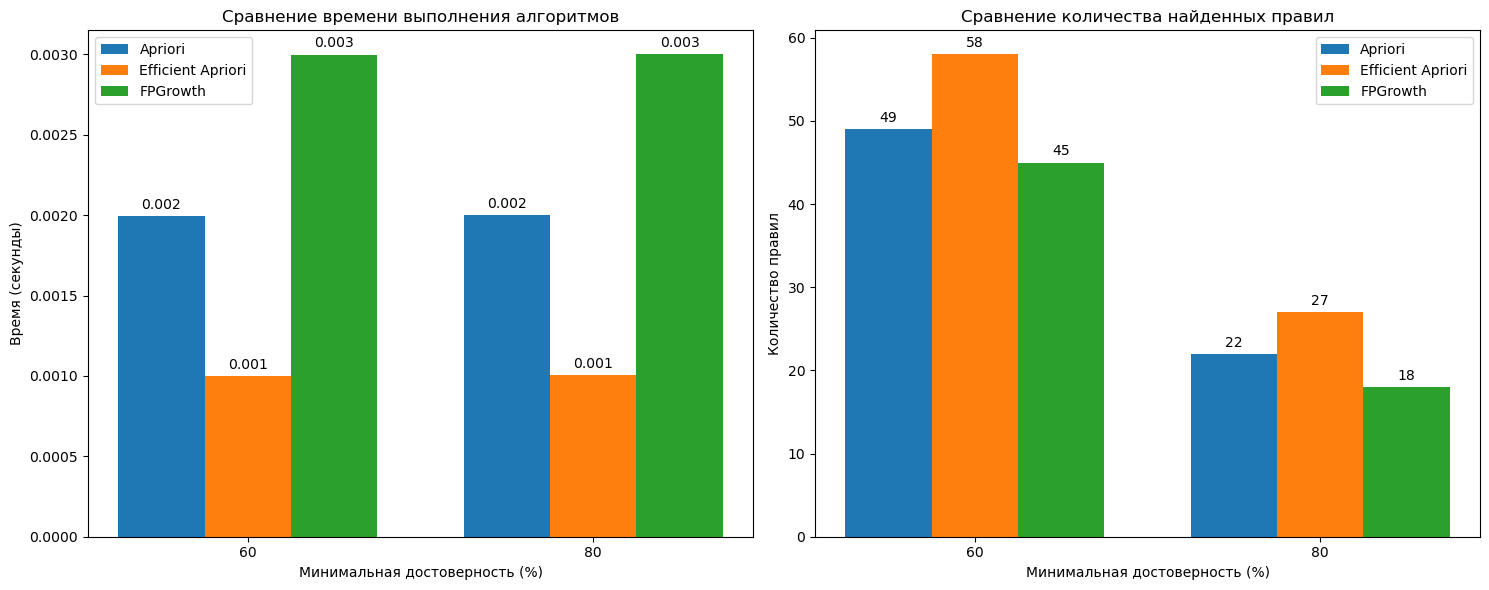

In [27]:
compare_algorithms(transactions, threshold/len(transactions), [60, 80])


## Вариант из репозиториев

1. Набор данных: 
http://archive.ics.uci.edu/ml/datasets/Online+Retail 

2. Набор данных: 
https://github.com/viktree/curly-octo-chainsaw/blob/master/BreadBasket_DMS.csv 

P.S. Можно предложить собственные «большие» наборы данных.

In [28]:
df = pd.read_csv('BreadBasket.csv')
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [29]:
data = df.groupby('Transaction')['Item'].apply(list).tolist()
data

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread', 'NONE'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['NONE', 'NONE', 'Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam', 'NONE'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread', 'NONE'],
 ['Bread', 'Tea'],
 



Apriori - Минимальная достоверность: 60%
Время выполнения: 7.4847 секунд
Количество найденных правил: 60
	Правило 1  (Достоверность: 0.602): {'Hot chocolate', 'Cake'} -> {'Coffee'}
	Правило 2  (Достоверность: 0.603): {'Cookies', 'Juice'} -> {'Coffee'}
	Правило 3  (Достоверность: 0.604): {'Bakewell'} -> {'Coffee'}
	Правило 4  (Достоверность: 0.607): {'Granola'} -> {'Coffee'}
	Правило 5  (Достоверность: 0.607): {'Scone', 'Hot chocolate'} -> {'Coffee'}

Apriori - Минимальная достоверность: 80%
Время выполнения: 7.5031 секунд
Количество найденных правил: 10
	Правило 1  (Достоверность: 0.810): {'Keeping It Local'} -> {'Coffee'}
	Правило 2  (Достоверность: 0.816): {'Extra Salami or Feta'} -> {'Coffee'}
	Правило 3  (Достоверность: 0.833): {'Vegan mincepie', 'Cake'} -> {'Coffee'}
	Правило 4  (Достоверность: 0.833): {'Sandwich', 'Salad'} -> {'Coffee'}
	Правило 5  (Достоверность: 0.833): {'NONE', 'Scone'} -> {'Coffee'}


Efficient Apriori - Минимальная достоверность: 60%
Время выполнения: 0.07

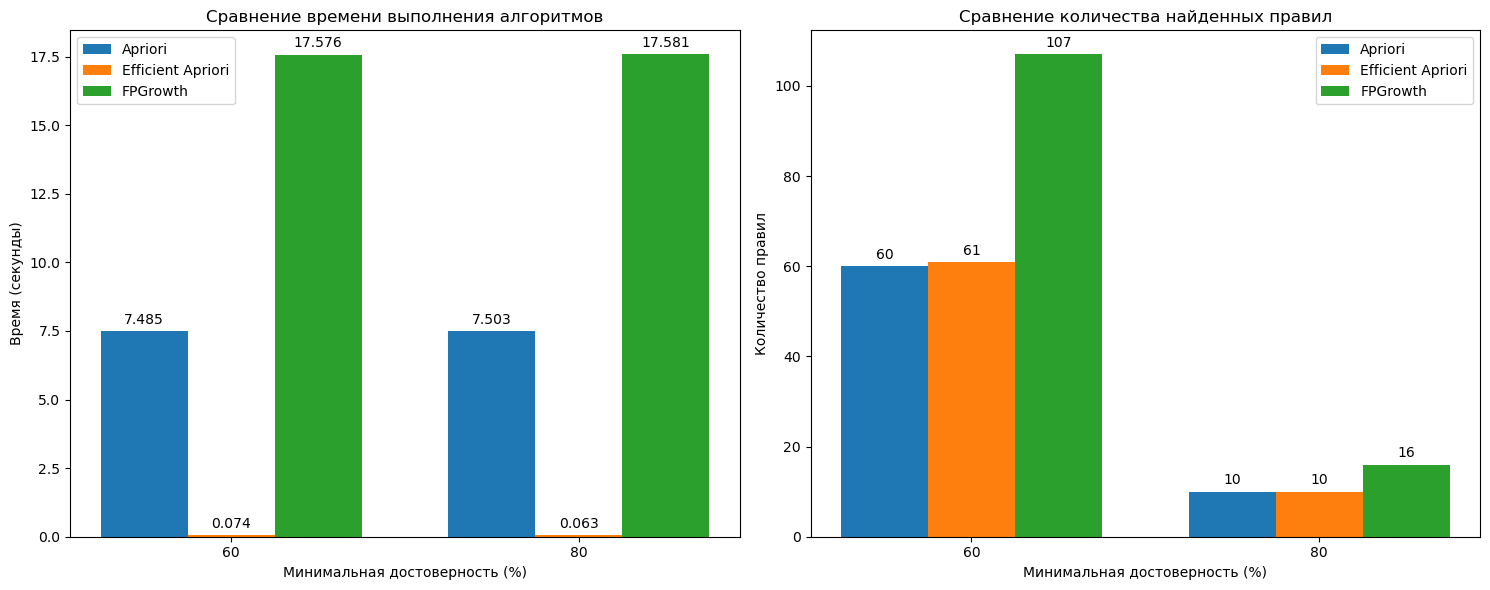

In [30]:
compare_algorithms(data, 0.001, [60, 80])